# Quest 04: 통계 기초

# 1. 통계 문제 

## 문제 1)

- 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다. 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다. 그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요

### p_value 계산

In [10]:
### p_value 계산

from scipy.stats import t

t_stat = -2.5
df = 24
p_value = 2 * t.cdf(t_stat, df)  # 또는 2 * t.sf(abs(t_stat), df)
print(p_value.round(4))  # ≈ 0.0197


0.0197


### 방법1

In [11]:
from scipy.stats import t
import numpy as np

def one_sample_t_test(sample_mean, sample_std, sample_size, pop_mean=0, alpha=0.05):
    """
    단일 표본 t-검정을 수행하는 함수입니다.
    
    Parameters:
        sample_mean (float): 표본 평균
        sample_std (float): 표본 표준편차
        sample_size (int): 표본 크기
        pop_mean (float): 귀무가설의 모평균 (기본값: 0)
        alpha (float): 유의수준 (기본값: 0.05)
    
    Returns:
        None (결과를 출력합니다)
    """
    # 통계량 계산
    t_statistic = (sample_mean - pop_mean) / (sample_std / np.sqrt(sample_size))
    df = sample_size - 1

    # p-value (양측 검정)
    p_value = 2 * t.cdf(t_stat, df)

    # 결과 출력
    if p_value < alpha:
        print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 평균은 모평균과 다릅니다.")
    else:
        print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 평균은 모평균과 통계적으로 차이가 없습니다.")

# 사용 예시
one_sample_t_test(sample_mean=495, sample_std=10, sample_size=25, pop_mean=500, alpha=0.05)


t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 평균은 모평균과 다릅니다.


### 방법2 산술계산을 먼저하고 값을 구함

In [12]:
t_statistic = -2.5
p_value = 0.0197
alpha = 0.05

if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")


t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


## 문제2) 분포 시각화

문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

***기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

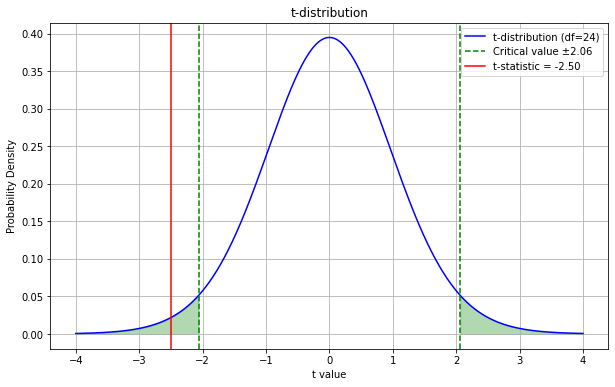

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters
mu = 500         # Null hypothesis mean
x_bar = 495      # Sample mean
s = 10           # Sample standard deviation
n = 25           # Sample size
df = n - 1       # Degrees of freedom
alpha = 0.05     # Significance level

# t statistic
t_stat = (x_bar - mu) / (s / np.sqrt(n))

# Create t-distribution
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

# Critical t values for two-tailed test
t_crit = t.ppf(1 - alpha/2, df)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-distribution (df=24)', color='blue')
plt.axvline(-t_crit, color='green', linestyle='--', label=f'Critical value ±{t_crit:.2f}')
plt.axvline(t_crit, color='green', linestyle='--')
plt.axvline(t_stat, color='red', linestyle='-', label=f't-statistic = {t_stat:.2f}')

# Shade rejection regions
x_reject_left = np.linspace(-4, -t_crit, 200)
x_reject_right = np.linspace(t_crit, 4, 200)
plt.fill_between(x_reject_left, t.pdf(x_reject_left, df), color='green', alpha=0.3)
plt.fill_between(x_reject_right, t.pdf(x_reject_right, df), color='green', alpha=0.3)

# Labels and legend
plt.title('t-distribution')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


## 문제 3) 단일 t 표본 검정
- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.

In [16]:
import statistics 
from scipy.stats import ttest_1samp

# 예시 데이터
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]

# 귀무가설에서 가정한 모집단 평균 (교육 프로그램 효과가 없다면 유지될 것으로 예상되는 평균)
# 이 값은 가설 설정에 의해 주어지거나 알려진 값입니다. 표본 데이터로 계산하지 않습니다.
pop_mean = 75
print(f"귀무가설의 모집단 평균 (가설값): {pop_mean}")

sample_mean = 78.00 #주어진 값
print(f"표본 평균: {sample_mean:.2f}")

# 유의수준
alpha = 0.05

# 단일 표본 t-검정 (양측검정) 수행
# ttest_1samp 함수는 내부적으로 sample_scores의 평균을 계산하여 pop_mean과 비교합니다.
t_stat, p_value = ttest_1samp(sample_scores, pop_mean)

# 결과 출력 

if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다.")


귀무가설의 모집단 평균 (가설값): 75
표본 평균: 78.00
t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


### 문제 4) 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.

In [22]:
from scipy.stats import ttest_ind, levene
import statistics # 표본 평균/분산 확인을 위해 추가 (선택 사항)

# 그룹 A와 B의 체중 감소량 데이터
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

# 유의수준
alpha = 0.05

print("### 독립 표본 t 검정 ###")
print(f"그룹 A 데이터 ({len(group_A)}명): {group_A}")
print(f"그룹 B 데이터 ({len(group_B)}명): {group_B}")
print(f"유의수준 (alpha): {alpha}\n")

# 참고: 표본 평균 및 분산 확인 (선택 사항)
print(f"그룹 A 평균: {statistics.mean(group_A):.2f}, 분산: {statistics.variance(group_A):.4f}")
print(f"그룹 B 평균: {statistics.mean(group_B):.2f}, 분산: {statistics.variance(group_B):.4f}\n")


# 1. 등분산 검정 (Levene's test)
# 귀무가설: 두 그룹의 분산이 같다.
# 대립가설: 두 그룹의 분산이 다르다.
levene_stat, levene_p = levene(group_A, group_B)

print(f"Levene 검정 결과:")
print(f"  검정 통계량: {levene_stat:.4f}")
print(f"  p-value: {levene_p:.4f}")

if levene_p < alpha:
    print(f"  p-value ({levene_p:.4f}) < alpha ({alpha}) 이므로, 귀무가설을 기각합니다.")
    print("  결론: 두 그룹의 분산이 다르다고 할 수 있습니다 (등분산 가정 충족 안됨).")
    equal_variances = False # Welch's t-test 사용
else:
    print(f"  p-value ({levene_p:.4f}) >= alpha ({alpha}) 이므로, 귀무가설을 채택합니다.")
    print("  결론: 두 그룹의 분산이 같다고 할 수 있습니다 (등분산 가정 충족).")
    equal_variances = True # 일반 t-test 사용

print("-" * 80)

# 2. 독립 표본 t 검정
# 귀무가설: 두 그룹의 평균 체중 감소량은 같다.
# 대립가설: 두 그룹의 평균 체중 감소량은 다르다. (양측 검정)

# 등분산 검정 결과에 따라 equal_var 파라미터 설정
if equal_variances:
    print("등분산을 가정하고 t-검정을 수행합니다.")
    t_stat, p_value = ttest_ind(group_A, group_B, equal_var=True)
else:
    print("등분산을 가정하지 않고 Welch's t-검정을 수행합니다.")
    t_stat, p_value = ttest_ind(group_A, group_B, equal_var=False)

    
    

# 최종 결과 출력 
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")
    # 두 프로그램 간 효과에 통계적으로 유의미한 차이가 없다고 해석

### 독립 표본 t 검정 ###
그룹 A 데이터 (10명): [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
그룹 B 데이터 (12명): [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]
유의수준 (alpha): 0.05

그룹 A 평균: 5.31, 분산: 0.2899
그룹 B 평균: 4.11, 분산: 0.1136

Levene 검정 결과:
  검정 통계량: 1.2856
  p-value: 0.2703
  p-value (0.2703) >= alpha (0.05) 이므로, 귀무가설을 채택합니다.
  결론: 두 그룹의 분산이 같다고 할 수 있습니다 (등분산 가정 충족).
--------------------------------------------------------------------------------
등분산을 가정하고 t-검정을 수행합니다.
t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


### 문제 5) 대응표본 t검정



<aside>
💡대응표본 t-검정은 두 집단간 평균 차이를 비교할 때 사용되는 점은 독립 t검정 동일하나, 같은 집단에서 두 번 수집할 때 사용되는 검정입니다.( ex 고혈압 투여 전후 환자 단일 그룹의 혈압의 차) `scipy.stats` docs에서 적절한 함수를 찾아보고 적용해보세요. 
</aside>

- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.
- 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.

In [25]:
import numpy as np
from scipy.stats import ttest_rel # 대응 표본 t-검정 함수

# 운동 전후 체중 데이터 (numpy 배열 사용)
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

# 유의수준
alpha = 0.05

print("### 대응 표본 t 검정 ###")
print(f"운동 전 체중 데이터: {before}")
print(f"운동 후 체중 데이터: {after}")
print(f"유의수준 (alpha): {alpha}\n")

# 대응 표본 t-검정에서 등분산 검정이 필요한가요?
print("질문: 대응 표본 t-검정에서 등분산 검정이 필요한가요?")
print("답변: 아니요. 대응 표본 t-검정은 독립적인 두 그룹이 아닌, 동일 대상의 두 시점 데이터를 비교하므로 등분산 검정이 필요 없습니다.")
print("      대응 표본 t-검정은 각 쌍의 '차이(difference)'에 대한 단일 표본 t-검정과 개념적으로 유사합니다.\n")


# 대응 표본 t-검정 수행
# 귀무가설 (H0): 운동 프로그램 전후 체중 변화의 평균은 0이다. (효과 없음)
# 대립가설 (H1): 운동 프로그램 전후 체중 변화의 평균은 0이 아니다. (효과 있음 - 감소 또는 증가)
t_stat, p_value = ttest_rel(before, after)

# 결과 출력 (요청하신 형식에 맞춰 운동 프로그램 효과로 수정)
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.")
    
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 고혈압약은 효과가 없습니다.")

### 대응 표본 t 검정 ###
운동 전 체중 데이터: [70 80 65 90 75 85 78 82 68 73]
운동 후 체중 데이터: [68 78 64 88 74 83 77 80 67 72]
유의수준 (alpha): 0.05

질문: 대응 표본 t-검정에서 등분산 검정이 필요한가요?
답변: 아니요. 대응 표본 t-검정은 독립적인 두 그룹이 아닌, 동일 대상의 두 시점 데이터를 비교하므로 등분산 검정이 필요 없습니다.
      대응 표본 t-검정은 각 쌍의 '차이(difference)'에 대한 단일 표본 t-검정과 개념적으로 유사합니다.

t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.


### 문제 6) 표본 추출

- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.
- 데이터 불러오는 코드 & 예상결과

In [27]:
!pip install kagglehub
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 KB 5.0 MB/s eta 0:00:00


100%|██████████| 14.5M/14.5M [00:00<00:00, 91.4MB/s]

Extracting files...


Path to dataset files: /aiffel/.cache/kagglehub/datasets/mashlyn/online-retail-ii-uci/versions/3


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [28]:
# 'United Kingdom'(영국)에서 발생한 주문만 필터링
uk_data = retail[retail['Country'] == 'United Kingdom'].copy()
uk_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [30]:
# 수량(Quantity)이나 단가(UnitPrice)가 없는 행 제거
uk_data = uk_data.dropna(subset=['Quantity', 'Price'])
uk_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [40]:
population_mean = round(uk_data['TotalPrice'].mean(), 2)
print(f"모집단 평균 구매금액: {population_mean}")

모집단 평균 구매금액: 16.69


In [32]:
# 총 구매금액(TotalPrice) 계산: 수량 * 단가
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['Price']
uk_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
...,...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.4
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.6
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.0
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.8


In [42]:
print(f"모집단 평균 구매금액: {population_mean}")

# 결과 재현을 위한 랜덤 시드 고정
np.random.seed(42)

# 표본에서 평균 구매금액 계산 함수 정의
def sample_mean(data, sample_size):
    sample = data.sample(n=sample_size)  # 무작위로 sample_size 만큼 추출
    return round(sample['TotalPrice'].mean(), 2)  # 평균을 소수점 2자리로 반올림

# 사용할 표본 크기 목록
sample_sizes = [30, 100, 300, 30000]

# 각 표본 크기에 대해 평균 구매금액 계산 및 출력
for size in sample_sizes:
    mean_total_price = sample_mean(uk_data, size)
    print(f"표본 크기: {size}, 평균 구매금액: {mean_total_price}")
   

모집단 평균 구매금액: 16.69
표본 크기: 30, 평균 구매금액: 11.88
표본 크기: 100, 평균 구매금액: 12.99
표본 크기: 300, 평균 구매금액: 17.14
표본 크기: 30000, 평균 구매금액: 16.08


### 문제 7) 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

In [44]:
import scipy.stats as stats

# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()  # 표본 평균
    std_err = stats.sem(data)  # 표준 오차
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)  # t-분포 기반 신뢰 구간
    return mean, interval

# 표본 크기에 따라 신뢰 구간 비교
sample_sizes = [30, 100, 300, 30000]
for size in sample_sizes:
    sample = uk_data.sample(size, random_state=42)  # 랜덤 샘플 추출
    mean, interval = confidence_interval(sample['TotalPrice'])  # TotalPrice만 전달
    print(f"표본 크기: {size}, 평균: {mean:.2f}, 95% 신뢰구간: ({interval[0]:.2f}, {interval[1]:.2f})")


표본 크기: 30, 평균: 11.88, 95% 신뢰구간: (6.38, 17.38)
표본 크기: 100, 평균: 16.09, 95% 신뢰구간: (11.14, 21.03)
표본 크기: 300, 평균: 13.34, 95% 신뢰구간: (11.26, 15.42)
표본 크기: 30000, 평균: 16.76, 95% 신뢰구간: (15.75, 17.76)


### 문제 8 가설검정 t-test

- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

In [46]:
retail['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

In [47]:
retail['Country'].nunique()

43

In [51]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [53]:
# TotalPrice 계산
retail = retail.dropna(subset=['Quantity', 'Price'])


In [54]:
retail['TotalPrice'] = retail['Quantity'] * retail['Price']

In [55]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [56]:
# 국가별 데이터 필터링
uk = retail[retail['Country'] == 'United Kingdom']['TotalPrice']
uk

0           83.4
1           81.0
2           81.0
3          100.8
4           30.0
           ...  
1067350     23.4
1067351     23.6
1067352     30.0
1067353    214.8
1067354     70.8
Name: TotalPrice, Length: 981330, dtype: float64

In [57]:
germany = retail[retail['Country'] == 'Germany']['TotalPrice']
germany

579        15.00
580        13.20
581        10.50
582        19.80
583        15.00
           ...  
1067262    15.00
1067263    10.20
1067264    10.20
1067265    24.96
1067266    16.50
Name: TotalPrice, Length: 17624, dtype: float64

In [58]:
# 이상치 제거 (0 또는 음수 제거)
uk = uk[uk > 0]
germany = germany[germany > 0]

In [59]:
uk

0           83.4
1           81.0
2           81.0
3          100.8
4           30.0
           ...  
1067350     23.4
1067351     23.6
1067352     30.0
1067353    214.8
1067354     70.8
Name: TotalPrice, Length: 958502, dtype: float64

In [60]:
germany

579        15.00
580        13.20
581        10.50
582        19.80
583        15.00
           ...  
1067262    15.00
1067263    10.20
1067264    10.20
1067265    24.96
1067266    16.50
Name: TotalPrice, Length: 16694, dtype: float64

In [62]:
# 등분산을 가정한 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(uk, germany, equal_var=True)
t_stat, p_value

(-4.425438928640919, 9.625679673157096e-06)

In [63]:
print(f"t-통계량: {t_stat:.2f}, p-값: {p_value:.4f}")

t-통계량: -4.43, p-값: 0.0000


In [65]:
# 가설 검정 결과 해석
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")  ## 대립가설이란 이야기
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


# 2. A/B 테스트

문제 9~ 10) A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다. 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다. 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

- 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
- 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지

두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.

두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.

|  | **노출 수** | **구매 수** |
| --- | --- | --- |
| **페이지 A** | 1000 | 80 |
| **페이지 B** | 200 | 22 |


## **문제9)**

- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요

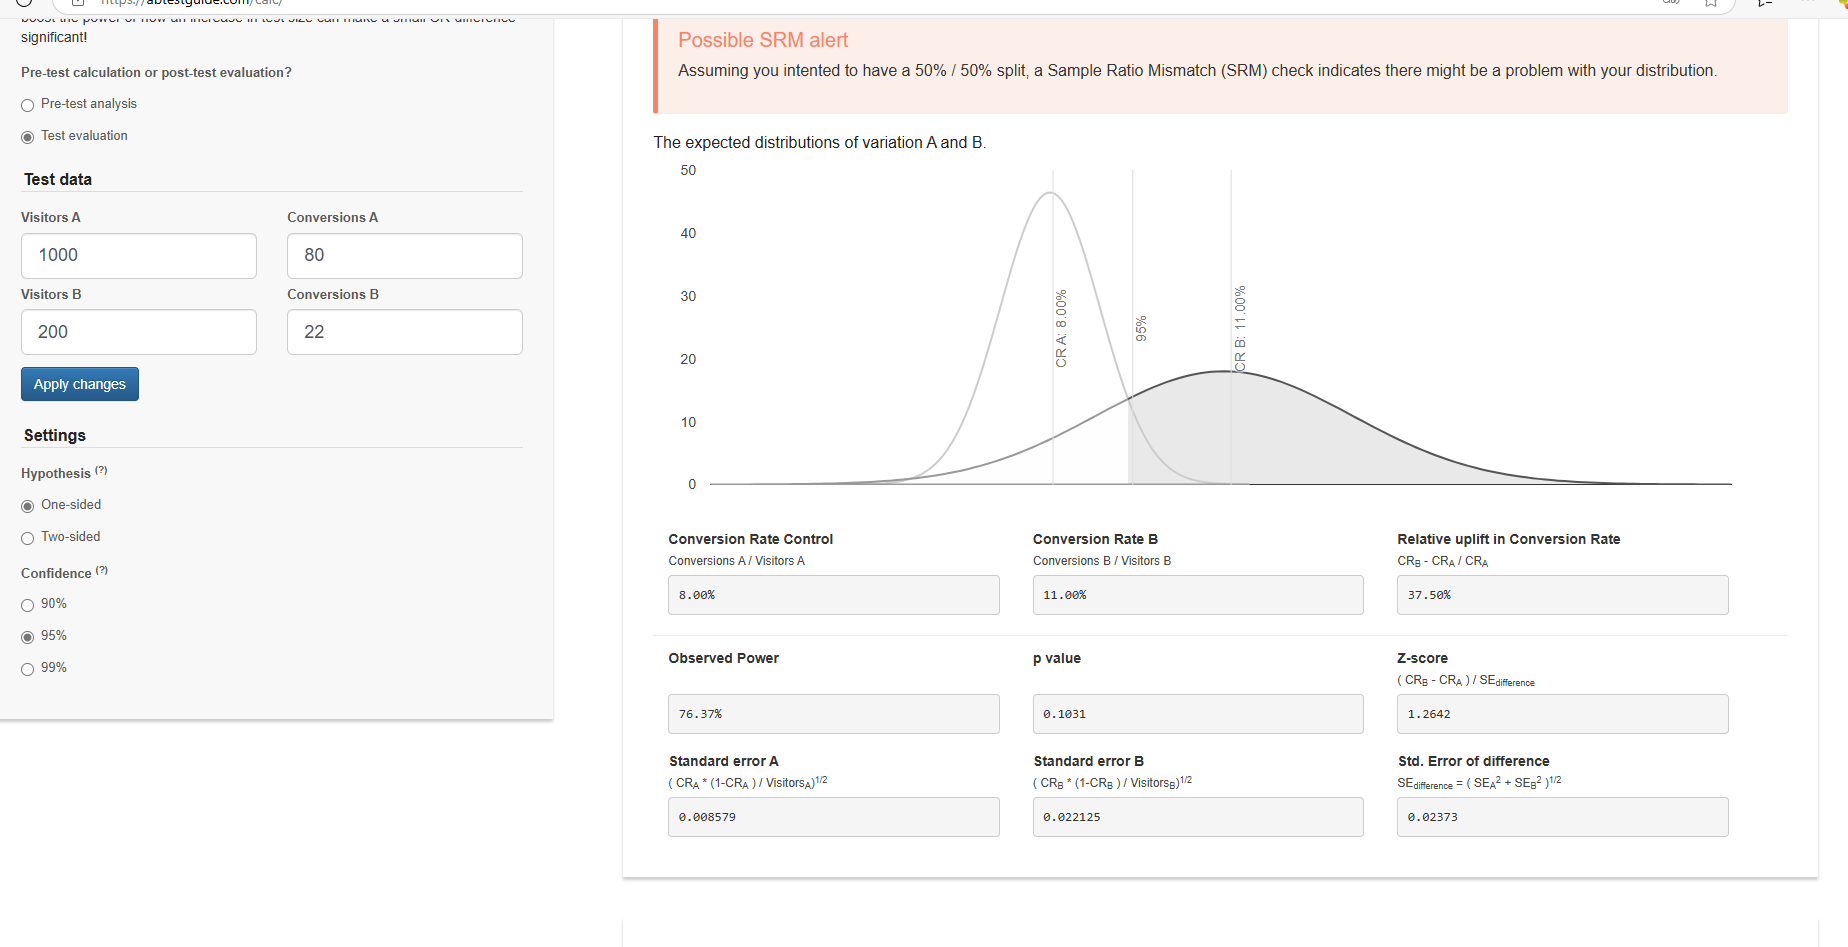


- 그림을 보면 
- Conversion Rate Control (페이지 A): 8.00% (80/1000)
- Conversion Rate Variant (페이지 B): 11.00% (22/200)
- Relative Uplift (상대적 개선율): 37.50%
- p-value: 0.1676
- 따라서 p-value > 0.05이므로 귀무가설(두 페이지 전환율에 차이가 없다)을 기각하지 못한다는 결론이 나옴

## **문제 10)**

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요(추천 문헌 [요즘IT](https://yozm.wishket.com/))

### 사례를 통한 설명:

### 상황: 한 이커머스 회사에서 상품 상세 페이지의 '장바구니 담기' 버튼 색상을 기존 파란색에서 초록색으로 변경하는 A/B 테스트를 진행했습니다. 목표 지표는 '장바구니 담기 전환율'입니다.

### 테스트 결과:
- 페이지 A (파란색 버튼): 1,000,000명 노출, 100,000명 장바구니 담기 -> 전환율 10.00%
- 페이지 B (초록색 버튼): 1,000,000명 노출, 100,100명 장바구니 담기 -> 전환율 10.01%

### 결론: 두 그룹 간 전환율 차이는 0.01%p 증가 (상대적 개선율 0.1%). A/B 테스트 결과, p-value가 0.05보다 작게 나와 통계적으로는 유의미하다는 결과가 나왔습니다 (방대한 표본 크기 때문에 미미한 차이도 유의미하게 나옴).


#### A/B 테스트 결과 p-value가 0.05보다 작아 '통계적으로 유의미'하더라도, 실제 전환율 차이(효과 크기)가 매우 작다면, 단순히 p-value만 보고 새로운 버전을 도입해서는 안 됩니다.

- 통계적 유의성: 관찰된 차이가 우연일 가능성이 낮다는 의미 (차이의 존재 여부).
- 실질적 의미: 관찰된 차이가 비즈니스/사용자 관점에서 중요할 만큼 큰가 (차이의 크기).
- 표본이 아주 크면 작은 차이도 통계적으로 유의미하게 나올 수 있습니다.

## 의사결정 시 고려할 것:

### 실제 효과 크기: 0.1%p 같은 미미한 차이가 비즈니스 목표에 실질적으로 얼마나 기여하는가?
### 도입 비용: 새로운 버전 개발/배포/유지보수에 드는 비용/시간/리소스를 감당할 만큼 효과가 큰가?
### 잠재적 위험/기회비용: 다른 중요한 지표에 악영향은 없는가? 더 큰 효과를 낼 다른 아이디어를 할 기회를 놓치는 것은 아닌가?

### 결론:
- 통계적 유의성은 필요조건이지만 충분조건이 아닙니다. 
- 실질적인 효과 크기가 비즈니스적으로 의미 있을 만큼 충분히 클 때만 새로운 버전을 도입하는 결정을 내려야 합니다.
- 미미한 차이는 통계적으로 유의하더라도 도입하지 않거나, 더 많은 데이터를 모아 확신을 가지거나, 다른 더 유망한 아이디어에 집중하는 것이 현명할 수 있습니다.




## 회고
- 잘한 점: 문제 이해를 한다는 점은 잘한점.
- 아쉬운 점: 문제를 이해하나 코드를 칠 수 없다는 점이 아쉽다.
- 개선할 점: 코드 연습을 열심히 해서 막힘없는 타이핑이 되었으면 함.